In [1]:
#Question 1
# Import Necessary Libraries
import pandas as pd

# Dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

# Assign to a variable as `users`
print("\nDataset Overview:\n", users.head())

# Mean Age Per Occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("\nStep 4: Mean Age Per Occupation:\n", mean_age_per_occupation)

# Male Ratio Per Occupation
male_ratio = users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()
male_ratio_sorted = male_ratio.sort_values(ascending=False)
print("\nStep 5: Male Ratio Per Occupation (Sorted):\n", male_ratio_sorted)

# Minimum and Maximum Age Per Occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nStep 6: Minimum and Maximum Age Per Occupation:\n", min_max_age_per_occupation)

# Mean Age Per Combination of Occupation and Gender
mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nStep 7: Mean Age Per Combination of Occupation and Gender:\n", mean_age_by_occupation_gender)

# Percentage of Women and Men Per Occupation
gender_count_per_occupation = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
gender_percentage = gender_count_per_occupation.div(gender_count_per_occupation.sum(axis=1), axis=0) * 100
print("\nStep 8: Percentage of Women and Men Per Occupation:\n", gender_percentage)



Dataset Overview:
    user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Step 4: Mean Age Per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5: Male Ratio Per Occupation (Sorted):
 occupation
doctor           1.0

In [34]:
#Question 2
# Import Necessary Libraries
import pandas as pd

# Dataset
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

#  Assign it to a variable as euro12
print("\nDataset Overview:\n", euro12.head())

# Select only the Goal column
goals = euro12['Goals']
print("\nStep 4: Goals Column:\n", goals)

#How many teams participated in Euro 2012?
num_teams = euro12['Team'].nunique()
print("\nStep 5: Number of Teams Participated in Euro 2012:", num_teams)

#  What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print("\nStep 6: Number of Columns in the Dataset:", num_columns)

#  View Team, Yellow Cards, and Red Cards; assign to discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nStep 7: Discipline DataFrame:\n", discipline)

#Sort the teams by Red Cards, then by Yellow Cards
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print("\nStep 8: Teams Sorted by Red Cards and Yellow Cards:\n", sorted_teams)

#Calculate the mean Yellow Cards given per Team
mean_yellow_cards = euro12['Yellow Cards'].mean()
print("\nStep 9: Mean Yellow Cards Given per Team:", mean_yellow_cards)

#  Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print("\nStep 10: Teams Scoring More Than 6 Goals:\n", teams_more_than_6_goals)

#Select the teams that start with 'G'
teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]['Team']
print("\nStep 11: Teams Starting with 'G':\n", teams_start_with_g.tolist())

#manually select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nStep 12: First 7 Columns:\n", first_7_columns.head())

#Select all columns except the last 3
all_but_last_3 = euro12.iloc[:, :-3]
print("\nStep 13: All Columns Except the Last 3:\n", all_but_last_3.head())

#Present only Shooting Accuracy from England, Italy, and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nStep 14: Shooting Accuracy for England, Italy, and Russia:\n", shooting_accuracy)



Dataset Overview:
              Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not s

In [2]:
#Question 3
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np

#Create 3 different Series
np.random.seed(42)  # Set seed for reproducibility
series1 = pd.Series(np.random.randint(1, 5, 100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, 100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, 100))  # Random numbers from 10,000 to 30,000

# Create a DataFrame by joining the Series by column
housing_df = pd.concat([series1, series2, series3], axis=1)

# Change the column names to 'bedrs', 'bathrs', 'price_sqr_meter'
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("\nStep 4: DataFrame with Renamed Columns:\n", housing_df.head())

#  Create a one-column DataFrame with values from the 3 Series
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))
bigcolumn.columns = ['bigcolumn']
print("\nStep 5: One-Column DataFrame (bigcolumn):\n", bigcolumn.head(105))  # Display more rows to verify

#  Check if the index goes only until 99
print("\nStep 6: Current Index Range in bigcolumn:\n", bigcolumn.index)

# : Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
print("\nStep 7: Reindexed bigcolumn DataFrame:\n", bigcolumn)




Step 4: DataFrame with Renamed Columns:
    bedrs  bathrs  price_sqr_meter
0      3       3            23931
1      4       2            13627
2      1       2            26157
3      3       2            20173
4      3       2            28047

Step 5: One-Column DataFrame (bigcolumn):
     bigcolumn
0           3
1           4
2           1
3           3
4           3
..        ...
0           3
1           2
2           2
3           2
4           2

[105 rows x 1 columns]

Step 6: Current Index Range in bigcolumn:
 Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64', length=300)

Step 7: Reindexed bigcolumn DataFrame:
      bigcolumn
0            3
1            4
2            1
3            3
4            3
..         ...
295      11154
296      14499
297      16295
298      22183
299      22874

[300 rows x 1 columns]


In [42]:
# Import Libraries
import pandas as pd
import numpy as np

# Load Dataset
data_path = r'C:\Users\nishi\OneDrive\Desktop\data analysis programming\problem set 3\wind.txt'
data = pd.read_csv(data_path, sep=r'\s+', header=None)  # Use raw string for `sep`

# Assign Column Names
data.columns = ['Year', 'Month', 'Day', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA',
                'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

# Replace Year, Month, Day with Datetime Index
data['Date'] = pd.to_datetime(
    data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1),
    format='%Y-%m-%d',
    errors='coerce'
)
data.set_index('Date', inplace=True)
data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Fix Incorrect Years
def fix_years(date):
    if date.year > 2000:  # Assume only '2061' is incorrect
        return date.replace(year=date.year - 100)
    return date

data.index = data.index.map(fix_years)

# Ensure Columns are Numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Missing Values
missing_values = data.isnull().sum()
print("Missing values per location:\n", missing_values)

# Total Non-Missing Values
non_missing_total = data.notnull().sum().sum()
print("\nTotal non-missing values:", non_missing_total)

# Overall Mean Windspeed
mean_windspeed = data.mean().mean()
print("\nOverall mean windspeed:", mean_windspeed)

# Location Statistics
loc_stats = data.agg(['min', 'max', 'mean', 'std']).transpose()
print("\nLocation statistics:\n", loc_stats)

# Daily Statistics
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print("\nDaily statistics (first 5 days):\n", day_stats.head())

# Average Windspeed in January
january_data = data[data.index.month == 1]
avg_january_windspeed = january_data.mean()
print("\nAverage windspeed in January per location:\n", avg_january_windspeed)


Missing values per location:
 RPT    7
VAL    4
ROS    3
KIL    6
SHA    3
BIR    1
DUB    4
CLA    3
MUL    4
CLO    2
BEL    1
MAL    5
dtype: int64

Total non-missing values: 78857

Overall mean windspeed: 10.227982360836938

Location statistics:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Daily statistics (first 5 days):
        min    max       mean       std
Date                                  
NaT    NaN    NaN        NaN       NaN
NaT   9.29  18.50  13.018182  2.808875
NaT   6.50  17.54  11.336364  3.188994
NaT   6.17  18.50  11.641

In [43]:
#Question5
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print("\nStep 4: First 10 Entries:\n", chipo.head(10))

# Step 5: Number of observations in the dataset
num_observations = chipo.shape[0]
print("\nStep 5: Number of Observations:", num_observations)

# Step 6: Number of columns in the dataset
num_columns = chipo.shape[1]
print("\nStep 6: Number of Columns:", num_columns)

# Step 7: Print the names of all the columns
column_names = chipo.columns.tolist()
print("\nStep 7: Column Names:\n", column_names)

# Step 8: How is the dataset indexed?
dataset_index = chipo.index
print("\nStep 8: Dataset Index:\n", dataset_index)

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
print("\nStep 9: Most-Ordered Item:", most_ordered_item)

# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_quantity = chipo.groupby('item_name')['quantity'].sum().max()
print("\nStep 10: Quantity of Most-Ordered Item:", most_ordered_quantity)

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().idxmax()
print("\nStep 11: Most Ordered Item in Choice Description:", most_ordered_choice)

# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("\nStep 12: Total Items Ordered were:", total_items_ordered)

# Step 13: Turn the item price into a float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
print("\nStep 13: Item Price Column Converted to Float\nType:", chipo['item_price'].dtype)

# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nStep 14: Total Revenue for the Dataset is: $", revenue)

# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("\nStep 15: Total Number of Orders are:", num_orders)

# Step 16: What is the average revenue amount per order?
avg_revenue_per_order = revenue / num_orders
print("\nStep 16: Average Revenue per Order is: $", avg_revenue_per_order)

# Step 17: How many different items are sold?
num_unique_items = chipo['item_name'].nunique()
print("\nStep 17: Number of Different Items Sold is:", num_unique_items)



Step 4: First 10 Entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3  

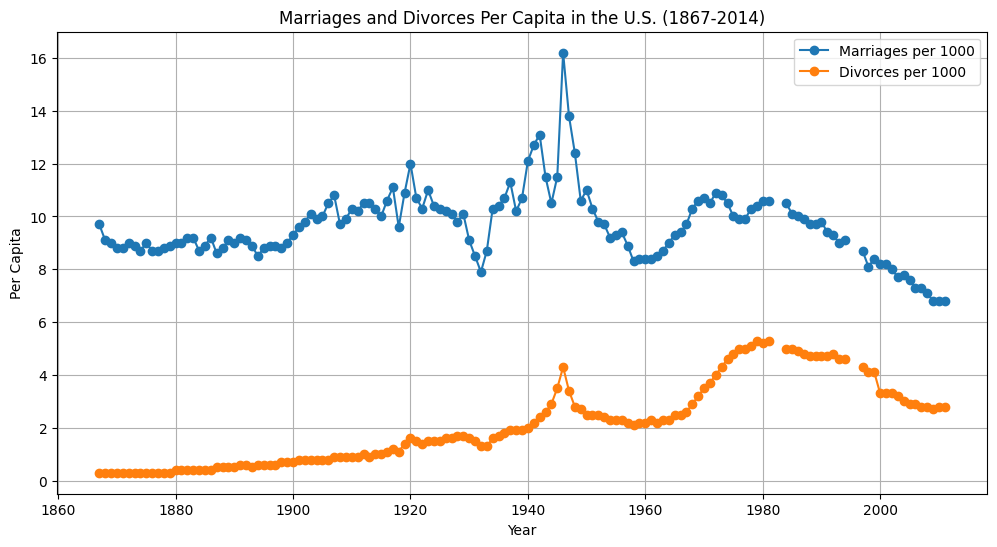

In [44]:
# Question 6: Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014.
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = r'C:\Users\nishi\OneDrive\Desktop\data analysis programming\problem set 3\us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(data_path)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', marker='o')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', marker='o')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces Per Capita in the U.S. (1867-2014)')
plt.legend()
plt.grid()
plt.show()



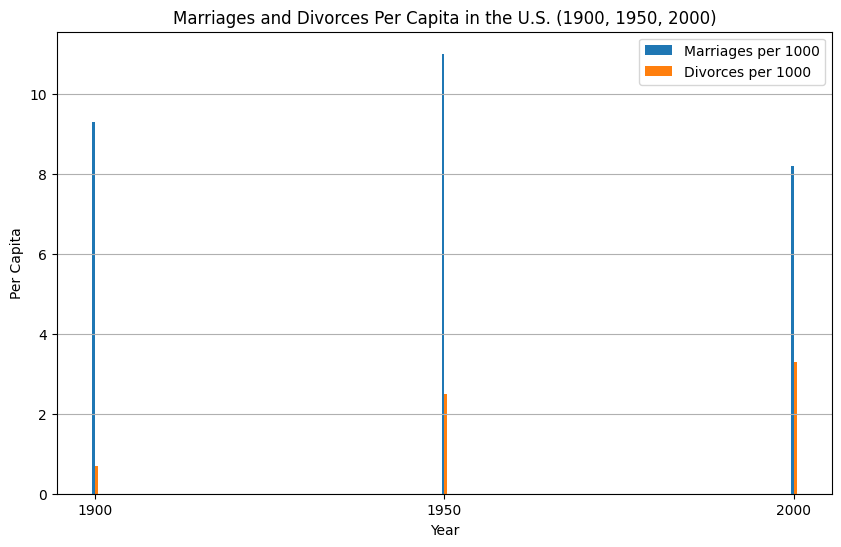

In [45]:
# Question 7: Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000
# Filter data for 1900, 1950, and 2000
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4
years = filtered_data['Year']

# Plot bars for Marriages and Divorces
plt.bar(years - bar_width/2, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000')
plt.bar(years + bar_width/2, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(years)
plt.legend()
plt.grid(axis='y')
plt.show()


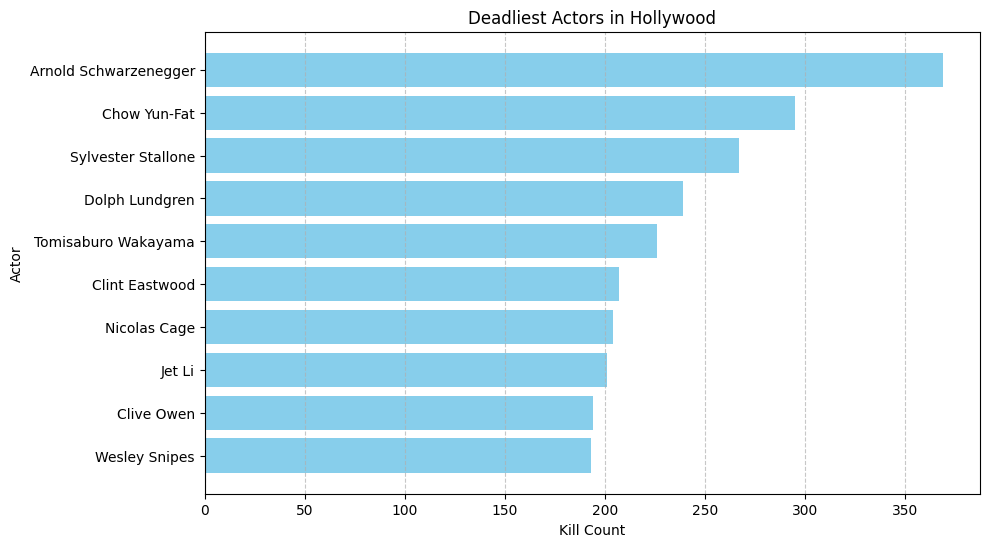

In [52]:
#Question8 Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sort the data by the `Count` column
actors = actors.sort_values(by='Count', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(actors['Actor'], actors['Count'], color='skyblue')

# Add labels, title, and grid
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


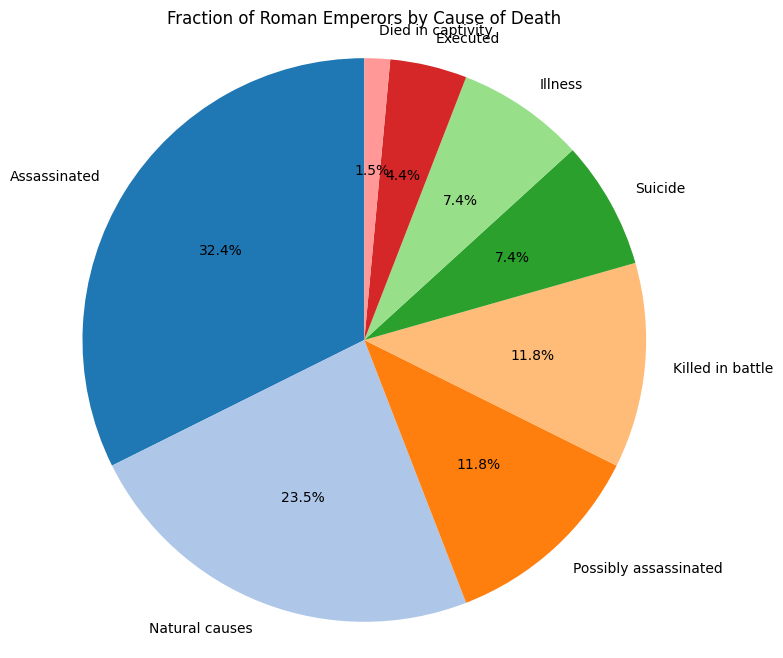

In [53]:
#Question 9 Create a pie chart showing the fraction of all Roman Emperors that were
assassinated
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\nishi\OneDrive\Desktop\data analysis programming\problem set 3\roman-emperor-reigns.csv'
emperors = pd.read_csv(file_path)

# Count the causes of death
death_counts = emperors['Cause_of_Death'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(death_counts, labels=death_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

# Add title and format
plt.title('Fraction of Roman Emperors by Cause of Death')
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()


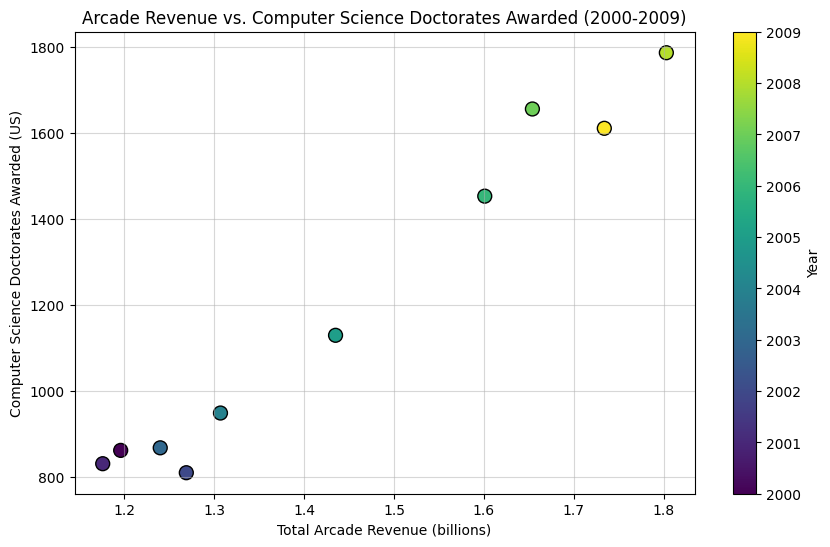

In [56]:
#Question 10 Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (ensure the file path is correct)
file_path = r'C:\Users\nishi\OneDrive\Desktop\data analysis programming\problem set 3\arcade-revenue-vs-cs-doctorates.csv'
arcade_data = pd.read_csv(file_path)

# Filter data for years 2000-2009
arcade_data_filtered = arcade_data[(arcade_data['Year'] >= 2000) & (arcade_data['Year'] <= 2009)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    arcade_data_filtered['Total Arcade Revenue (billions)'], 
    arcade_data_filtered['Computer Science Doctorates Awarded (US)'],
    c=arcade_data_filtered['Year'], cmap='viridis', edgecolor='k', s=100
)

# Add colorbar, labels, and title
plt.colorbar(scatter, label='Year')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Arcade Revenue vs. Computer Science Doctorates Awarded (2000-2009)')

# Show the plot
plt.grid(alpha=0.5)
plt.show()
